# Task 1: text cosine distance

In [1]:
with open('./sentences.txt') as file:
    text = str.lower(file.read())
print (text[:200])

in comparison to dogs, cats have not undergone major changes during the domestication process.
as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will 


In [2]:
import re
import numpy as np

def filter_by_len(s, l):
    return np.array(s)[np.array([len(i) for i in s]) > l]
    
words = filter_by_len(np.unique(re.split('[^a-z]',text)), 0)
sentences = filter_by_len(re.split('\n', text), 0)

matrix = np.array([i.tolist().count(j) for i \
    in [filter_by_len(w,0) for w in [[a for a in re.split('[^a-z]', s)] for s in sentences]] for j in words]) \
    .reshape(len(sentences), len(words))

matrix.shape

(22, 254)

In [3]:
from scipy.spatial.distance import cosine

distance = [(cosine(matrix[0], i), j, k) for i,j,k in zip(matrix, range(len(sentences)), sentences)]
distance.sort(key = lambda t: t[0])
distance[:3]

[(0.0,
  0,
  'in comparison to dogs, cats have not undergone major changes during the domestication process.'),
 (0.7327387580875756,
  6,
  'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).'),
 (0.7770887149698589,
  4,
  'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.')]

# Task 2: function approximation

In [4]:
import matplotlib.pyplot as plt
from scipy.linalg import solve
from math import sin, exp

def complex_func(x):
    return sin(x/5)*exp(x/10) + 5*exp(-x/2)

def generate_data(f):
    X = np.arange(1,15,0.01)
    Y = [f(x) for x in X]
    return X.tolist(),Y

def approximate(x):
    b = [complex_func(i) for i in x]
    A = [[i**p for p in range(len(x))] for i in x]
    return A, b, solve(A, b)

def f_polynom(x, w):
    return sum([wi*(x**p) for wi,p in zip(w, range(len(w)))])
    

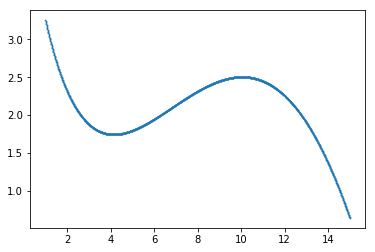

In [5]:
x,y = generate_data(complex_func)
plt.scatter(x,y, s=0.5)

In [6]:
A, b, w_1 = approximate([1,15])
print (A, b, w_1)
print(np.dot(w_1,A))

[[1, 1], [1, 15]] [3.252216865271419, 0.6352214195786656] [ 3.43914511 -0.18692825]
[3.25221687 0.63522142]


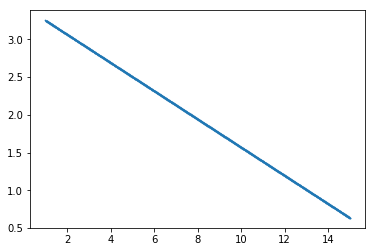

In [7]:
x,y = generate_data(lambda x: f_polynom(x, w_1))
plt.scatter(x,y, s=0.5)

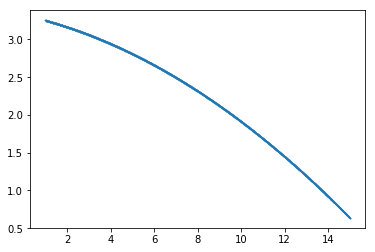

In [10]:
A, b, w_2 = approximate([1,8,15])
x,y = generate_data(lambda x: f_polynom(x, w_2))
plt.scatter(x,y, s=0.5)

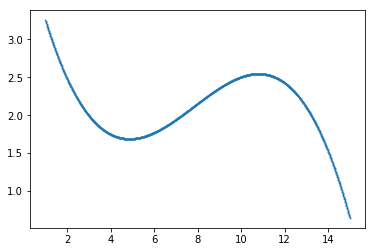

In [11]:
A, b, w_3 = approximate([1,4,10,15])
x,y = generate_data(lambda x: f_polynom(x, w_3))
plt.scatter(x,y, s=0.5)

In [12]:
w_3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])